In [1]:
# Libraries
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import pandas as pd
import numpy as np
import mitosheet
import pickle
import dtale
import time
import re
from ydata_profiling import ProfileReport

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
from sklearn.metrics import mean_absolute_error as mae
from tabulate import tabulate

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Import Dataset
df = pd.read_csv('../Data/airline_passenger_satisfaction.csv')

Género: Género de los pasajeros (Mujer, Hombre)

Tipo de cliente: el tipo de cliente (cliente leal, cliente desleal)

Edad: La edad real de los pasajeros.

Tipo de Viaje: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Clase: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

Distancia de vuelo: la distancia de vuelo de este viaje.

Servicio wifi a bordo: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)

Hora de salida/llegada conveniente: Nivel de satisfacción de la hora de salida/llegada conveniente

Facilidad de reserva en línea: nivel de satisfacción de la reserva en línea

Ubicación de la puerta: Nivel de satisfacción de la ubicación de la puerta

Comida y bebida: Nivel de satisfacción de Comida y bebida

Embarque online: Nivel de satisfacción del embarque online

Confort del asiento: Nivel de satisfacción del confort del asiento

Entretenimiento a bordo: Nivel de satisfacción del entretenimiento a bordo

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Servicio de habitaciones para piernas: Nivel de satisfacción del servicio de habitaciones para piernas

Manejo de equipaje: Nivel de satisfacción en el manejo de equipaje

Servicio de Check-in: Nivel de satisfacción del servicio de Check-in

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Limpieza: Nivel de satisfacción de la Limpieza

Retraso de salida en minutos: Minutos de retraso a la salida

Retraso de llegada en minutos: Minutos de retraso cuando llega

Satisfacción: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)

In [3]:
# # Guarda en un cvs las primeras 10 filas
# df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
# df.head(10).to_csv('../Data/first_10_rows.csv')

In [4]:
# VEMOS LA INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# VEMOS EL TAMAÑO DEL DATASET
df.shape

(103904, 25)

In [6]:
# LA CANTIDAD DE NULOS POR COLUMNA
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## PODEMOS VER QUE LA UNICA COL QUE TIENE NULOS ES LA COLUMNA DE Arrival Delay in Minutes 

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

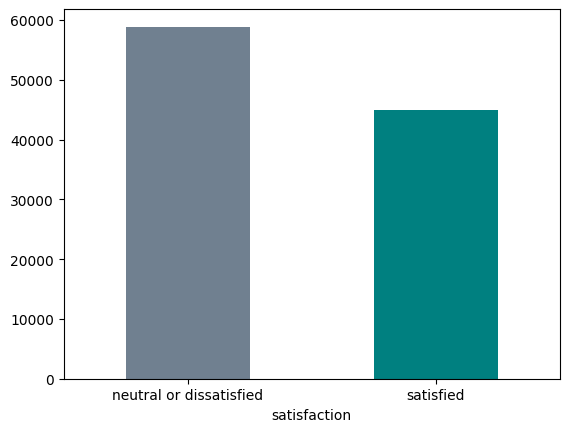

In [7]:
# GRAFICAMOS LA COL SATISFACTION
df['satisfaction'].value_counts(normalize = True)*100
df['satisfaction'].value_counts().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)

PODEMOS CONCLUIR CON LO SIGUIENTE :    
El 43,33% de los pasajeros están satisfechos con los servicios de la aerolínea.   
El 56,67% de los pasajeros se muestran neutrales o insatisfechos con los servicios de las aerolíneas

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



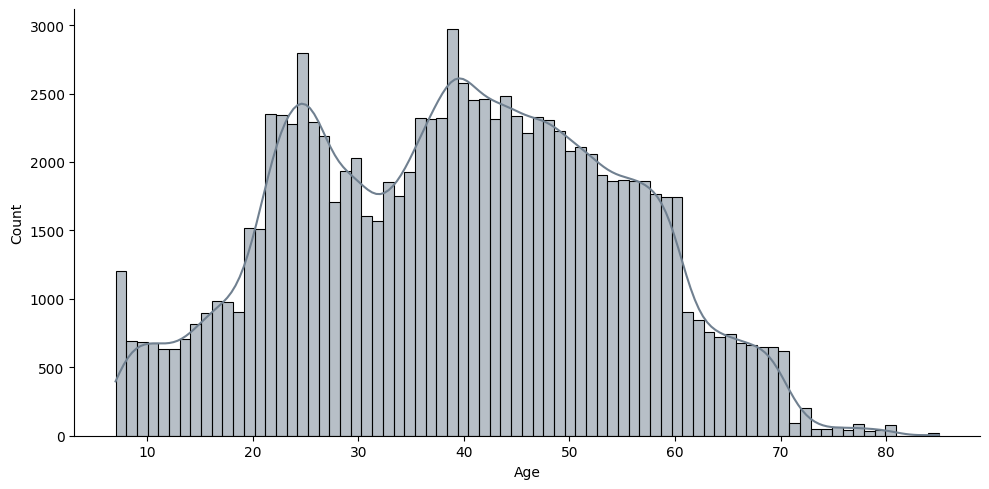

In [8]:
# GRAFICAMOS LA COL EDAD
sns.displot(df['Age'],kde=True,aspect=2,color='slategray')

PODEMOS VER QUE  :  
Más de 2.000 pasajeros tienen edades comprendidas entre 23 y 27 años y entre 35 y 45 años

/var/folders/d8/z387sy5n6jdg57dy2sd1lqbw0000gn/T/ipykernel_32150/1552480677.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/d8/z387sy5n6jdg57dy2sd1lqbw0000gn/T/ipykernel_32150/1552480677.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




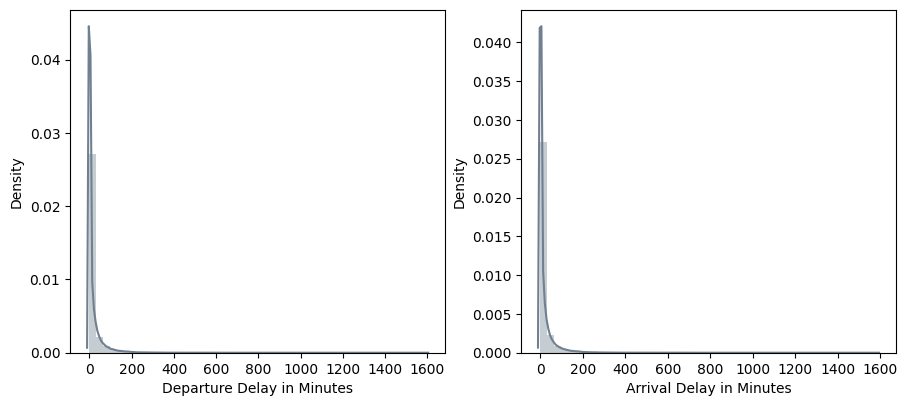

In [9]:
# GRAFICAMOS LA COL DE MINUTOS DE RETRASO
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(df['Departure Delay in Minutes'],color='slategray')
plt.subplot(122)
sns.distplot(df['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)

<!-- PODEMOS OBSERVAR QUE :  
Más de 4000 pasajeros viajan durante aproximadamente <800 distancias de vuelo -->

Text(0, 0.5, 'Ratio')

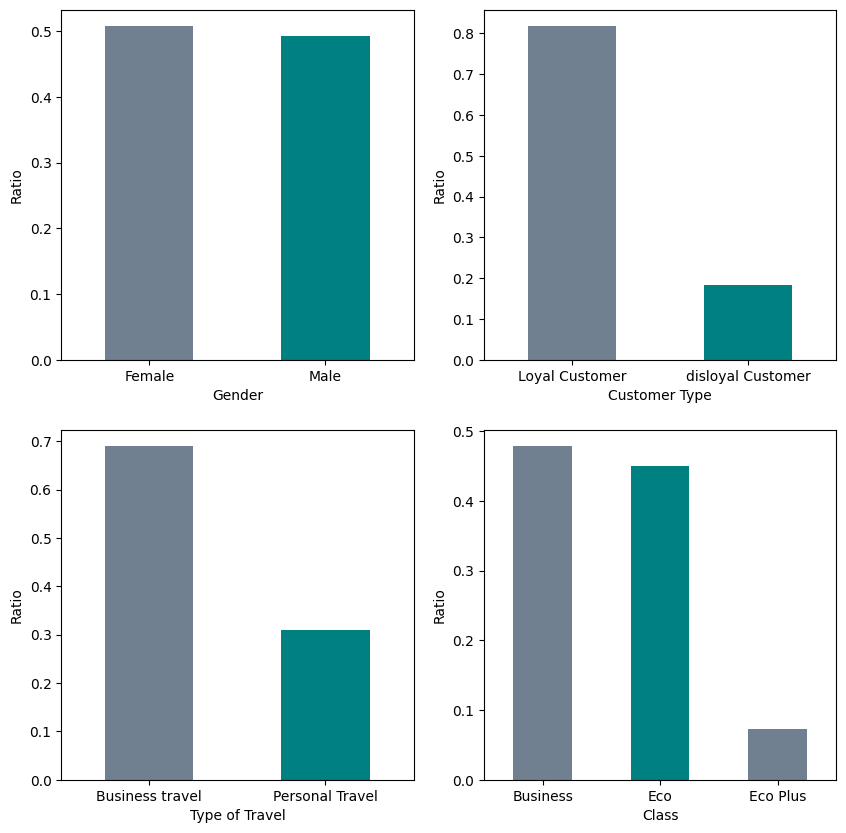

In [10]:
# GRAFICA DE GENERO, TIPO DE CLIENTE, TIPO DE VIAJE Y CLASE
plt.figure(1,figsize=(10,10))
plt.subplot(221)
df['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

plt.subplot(222)
df['Customer Type'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Customer Type')
plt.ylabel('Ratio')

plt.subplot(223)
df['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')


plt.subplot(224)
df['Class'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Class')
plt.ylabel('Ratio')

Variable independiente (Categórica: Nominal)   
Algunas de las características son nominales: género, tipo de cliente, tipo de viaje, clase


PODEMOS VER LO SIGUIENTE:  
Hay un 51% de pasajeras femeninas.   
El 82% de los pasajeros son clientes fieles.  
El 69% de los pasajeros viajan por motivos de negocios.   
El 48% de los pasajeros viaja en clase business y el 45% en clase Eco.

Text(0.5, 0, 'Inflight entertainment')

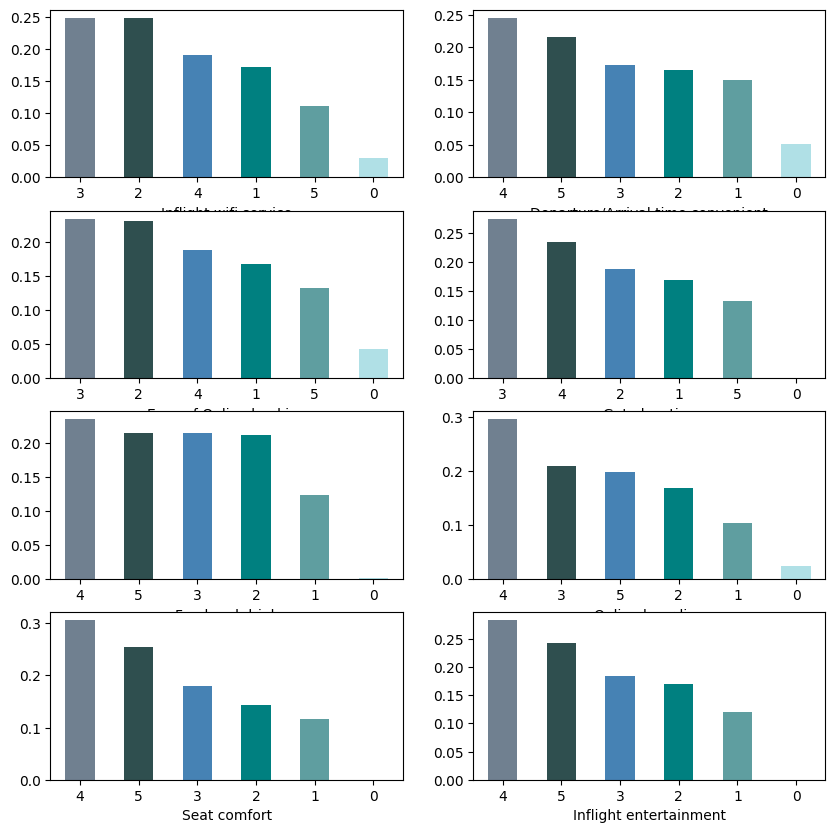

In [11]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
df['Inflight wifi service'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
df['Departure/Arrival time convenient'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
df['Ease of Online booking'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
df['Gate location'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
df['Food and drink'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
df['Online boarding'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
df['Seat comfort'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
df['Inflight entertainment'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')

Variable independiente (categórica: ordinal)  

Aproximadamente el 25 % de los pasajeros obtuvieron una calificación de 3 y el 25 % de ellos obtuvieron una calificación de 2 para el servicio wifi a bordo  

El 24% de los pasajeros calificaron con 4 la hora de salida/llegada conveniente y el 21% de los pasajeros calificaron con 5 la misma calificación.  

Aproximadamente el 23% de los pasajeros califica 3 por la facilidad de reserva en línea y el 23% de ellos califica 2  

El 27,5% de los pasajeros califica con 3 la ubicación de la puerta de embarque.  

Para servicio de alimentos y bebidas 23% de calificaciones = 4  
 
Para el embarque en línea aproximadamente el 30% de los pasajeros dieron 4 calificaciones  

Para la comodidad del asiento, la mayoría de los pasajeros tienen un nivel satisfactorio de 4.  
  
Aproximadamente el 28 % de los pasajeros otorgó 4 calificaciones al entretenimiento a bordo


In [12]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: >

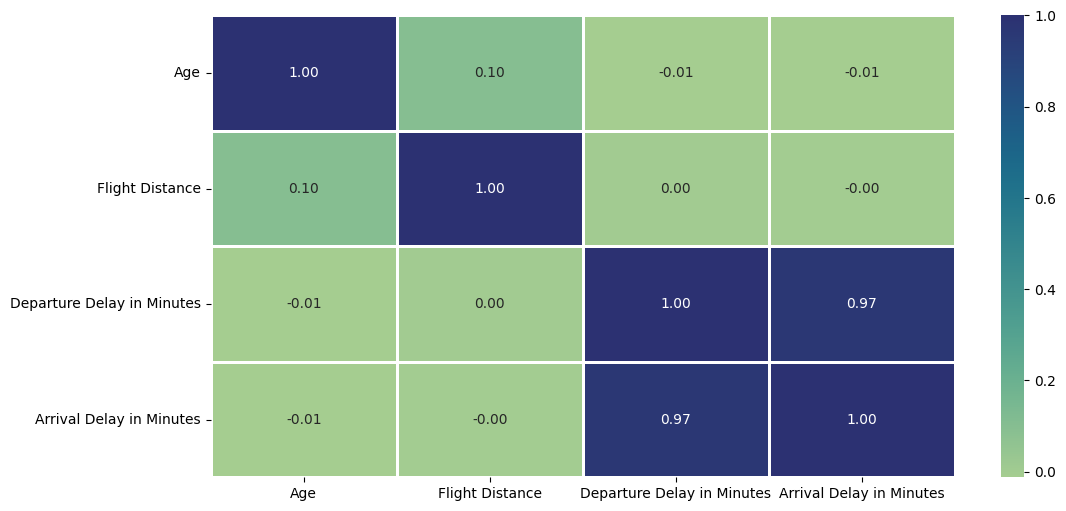

In [13]:
# Heatmap of the correlation between the features
plt.figure(figsize=(12, 6))
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.heatmap(df[num].corr(),
            cmap = 'crest',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [14]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

In [15]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Create and Design ML Model

In [16]:
# Creamos una copia del dataset que pasaremos a nuestro pipeline al final y otro al que se adjuntara las nuevas predicciones
df_model = df.copy()
df_to_upload = df.copy()

In [17]:
# Eliminamos las columnas que no vamos a usar
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_model.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_to_upload.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [18]:
# Define un mapeo de valores numéricos a la columna de satisfacción
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
def mapping(column, dic):
    return column.map(dic)

df['satisfaction'] = mapping(df['satisfaction'], satisfaction_mapping)
df_model['satisfaction'] = mapping(df_model['satisfaction'], satisfaction_mapping)

In [19]:
# Caracteristicas y objetivo para la busqueda del modelo óptimo
features = df.drop('satisfaction', axis=1)
target = df['satisfaction']

In [20]:
# Caracteristicas y objetivo para el modelo final que pasaremos al pipeline
features_model = df_model.drop('satisfaction', axis=1)
target_model = df_model['satisfaction']

In [21]:
# Creamos dos pipelines para procesar los datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [22]:
# Dividimos las columnas en categoricas y numericas
cat_columns = ["Gender", "Customer Type", 'Type of Travel', 'Class', "Inflight wifi service", "Departure/Arrival time convenient", 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
num_columns = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [23]:
# Creamos un preprocesador que aplica los pipelines a las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

In [24]:
# Ver el dataframe sin procesar
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [25]:
def split_data(features, target, test_size=0.4, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, test_size=0.5, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

In [26]:
models = [
    RandomForestClassifier(max_depth=2, random_state=0),
    GradientBoostingClassifier(
        learning_rate=0.3,
        loss="exponential",
        max_depth=4,
        min_samples_split=4,
        n_estimators=50,
    ),
    LogisticRegression(
    penalty='l2',
    C=0.2,
    max_iter=100,
),
    XGBClassifier(),
    GaussianNB(),
    CatBoostClassifier(),
]

In [27]:
def clean_name_model(model):
    pattern = r'(?<=[a-z])(?=[A-Z])'
    return re.sub(pattern, ' ', model)

def evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    time_start = time.time()
    model.fit(X_train, y_train)
    time_end = time.time()
    model_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
    
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mae_train = mae(y_train, train_predictions)
    test_mae_test = mae(y_test, test_predictions)
    overfitting_percentage = (test_mae_test - train_mae_train) / train_mae_train * 100
    
    # Calcular la curva ROC y el AUC para los datos de train y test
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Calcular las matrices de confusión y limpia el nombre del modelo
    conf_mx = confusion_matrix(y_test, y_pred_test)
    name_model = clean_name_model(model.__class__.__name__)

    return {
        'Model': name_model,
        'Model Scores': model_scores,
        'Accuracy (test)': accuracy_test,
        'Accuracy (validate)': accuracy_val,
        'Precision (test)': precision_test,
        'Precision (validate)': precision_val,
        'Recall (test)': recall_test,
        'Recall (validate)': recall_val,
        'Train MAE': train_mae_train,
        'Test MAE': test_mae_test,
        'Training Time': time_end - time_start,
        'Overfitting %': overfitting_percentage,
        'Confusion Matrix': conf_mx,
        'ROC Curve Train': (fpr_train, tpr_train, auc_train),
        'ROC Curve Test': (fpr, tpr, auc),
    }

def train_and_evaluate_models(features, target, models):
    # Dividimos los datos en train, test y validation
    X_train, X_test, y_train, y_test, X_val, y_val = split_data(features, target)
    
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    X_val = preprocessor.transform(X_val)
    
    # Evaluate the models
    metrics = []
    for model in models:
        model_metrics = evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val)
        metrics.append(model_metrics)

    return pd.DataFrame(metrics)

In [28]:
df_metrics = train_and_evaluate_models(features, target, models)

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Learning rate set to 0.06016
0:	learn: 0.6158838	total: 64.4ms	remaining: 1m 4s
1:	learn: 0.5667360	total: 71ms	remaining: 35.4s
2:	learn: 0.5093705	total: 77.2ms	remaining: 25.7s
3:	learn: 0.4741235	total: 83.7ms	remaining: 20.8s
4:	learn: 0.4351523	total: 90.3ms	remaining: 18s
5:	learn: 0.4120186	total: 96.5ms	remaining: 16s
6:	learn: 0.3875620	total: 103ms	remaining: 14.6s
7:	learn: 0.3699425	total: 110ms	remaining: 13.6s
8:	learn: 0.3514170	total: 117ms	remaining: 12.8s
9:	learn: 0.3331475	total: 123ms	remaining: 12.2s
10:	learn: 0.3186492	total: 130ms	remaining: 11.7s
11:	learn: 0.3060363	total: 137ms	remaining: 11.3s
12:	learn: 0.2879952	total: 143ms	remaining: 10.9s
13:	learn: 0.2731532	total: 150ms	remaining: 10.6s
14:	learn: 0.2550077	total: 157ms	remaining: 10.3s
15:	learn: 0.2446224	total: 163ms	remaining: 10s
16:	learn: 0.2355281	total: 170ms	remaining: 9.84s
17:	learn: 0.2308159	total: 177ms	remaining: 9.63s
18:	learn: 0.2253255	total: 183ms	remaining: 9.45s
19:	learn: 0.2

In [29]:
df_metrics

,Model,Model Scores,Accuracy (test),Accuracy (validate),Precision (test),Precision (validate),Recall (test),Recall (validate),Train MAE,Test MAE,Training Time,Overfitting %,Confusion Matrix,ROC Curve Train,ROC Curve Test
0,Random Forest Classifier,"[0.8592509423369957, 0.8553211965674874, 0.865...",0.850922,0.856215,0.855054,0.861173,0.792834,0.801032,0.145680,0.149078,0.969667,2.332646,"[[10492, 1219], [1879, 7191]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Gradient Boosting Classifier,"[0.9519608629400914, 0.9557302109230893, 0.957...",0.957461,0.956980,0.964270,0.963226,0.937266,0.937630,0.041882,0.042539,7.467401,1.568650,"[[11396, 315], [569, 8501]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Logistic Regression,"[0.9291041783623386, 0.9348784986767182, 0.932...",0.933449,0.932198,0.934834,0.932569,0.911025,0.911167,0.066360,0.066551,1.011039,0.288457,"[[11135, 576], [807, 8263]]","([0.0, 0.0, 0.0, 2.817377584943934e-05, 2.8173...","([0.0, 0.0, 0.0, 8.538980445734779e-05, 8.5389..."
3,XGBClassifier,"[0.9593391611195765, 0.962707514636298, 0.9663...",0.961551,0.962369,0.970960,0.969543,0.940022,0.943780,0.019634,0.038449,3.045663,95.830192,"[[11456, 255], [544, 8526]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Gaussian NB,"[0.7491378618975059, 0.6257117651776406, 0.625...",0.631779,0.626967,0.542938,0.540649,0.988423,0.989459,0.373905,0.368221,0.034802,-1.520241,"[[4164, 7547], [105, 8965]]","([0.0, 0.0520651377697639, 0.05209331154561334...","([0.0, 0.05268550935018359, 0.0526855093501835..."
5,Cat Boost Classifier,"[0.9596599566925976, 0.9636699013553613, 0.965...",0.963813,0.963524,0.973367,0.971748,0.942889,0.944219,0.020404,0.036187,7.951888,77.355646,"[[11477, 234], [518, 8552]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8173775...","([0.0, 0.0, 0.0, 8.538980445734779e-05, 8.5389..."


## Select Best Model

In [30]:
def plot_metrics(df_metrics):
    for i in range(len(df_metrics)):
        plt.figure(figsize=(12, 4))
        
        # Graficar la matriz de confusión
        plt.subplot(1, 2, 1)
        confusion_matrix = df_metrics['Confusion Matrix'][i]
        sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
        plt.title(df_metrics['Model'][i])
        
        # Agregar etiquetas a los cuadrantes
        plt.text(0.5, 0.25, "Verdaderos Positivos", ha='center', va='center', fontsize=9, color='white')
        plt.text(0.5, 1.25, "Falsos Negativos", ha='center', va='center', fontsize=9, color='black')
        plt.text(1.5, 0.25, "Falsos Positivos", ha='center', va='center', fontsize=9, color='black')
        plt.text(1.5, 1.25, "Verdaderos Negativos", ha='center', va='center', fontsize=9, color='white')
        
        # Graficar la curva ROC del conjunto de entrenamiento
        fpr_train, tpr_train, auc_train = df_metrics['ROC Curve Train'][i]
        
        # Graficar la curva ROC del conjunto de prueba
        fpr_test, tpr_test, auc_test = df_metrics['ROC Curve Test'][i]
        
        plt.subplot(1, 2, 2)
        plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train AUC = {auc_train:.2f}')
        plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test AUC = {auc_test:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        
        plt.tight_layout()
        plt.show()


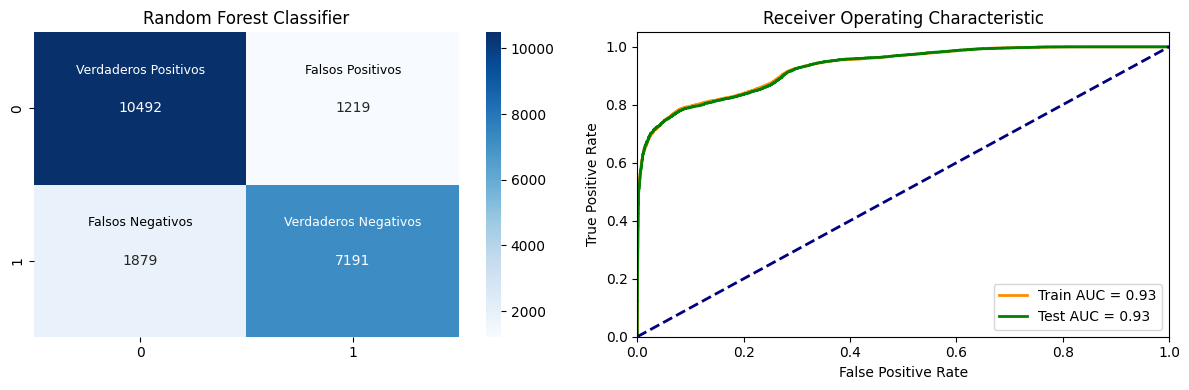

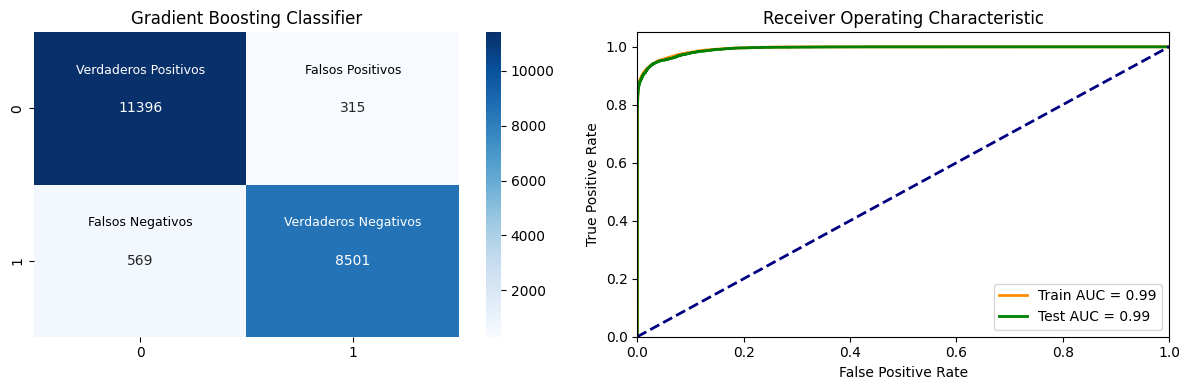

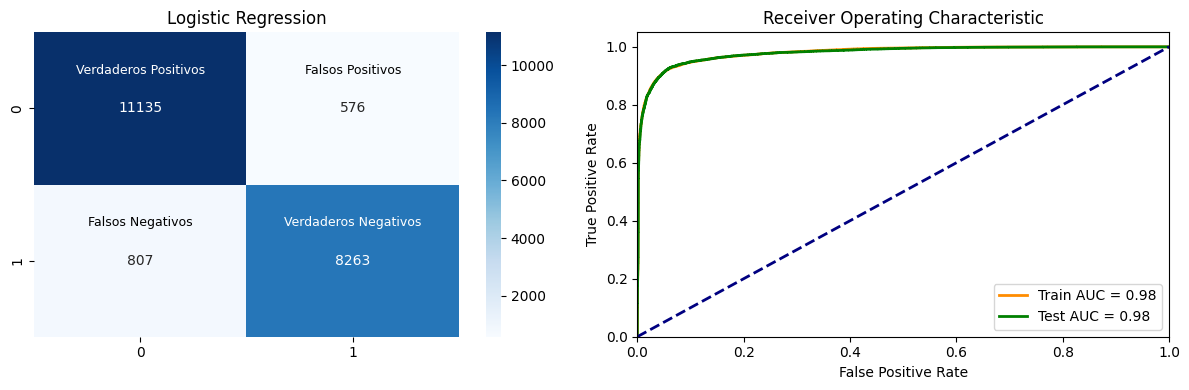

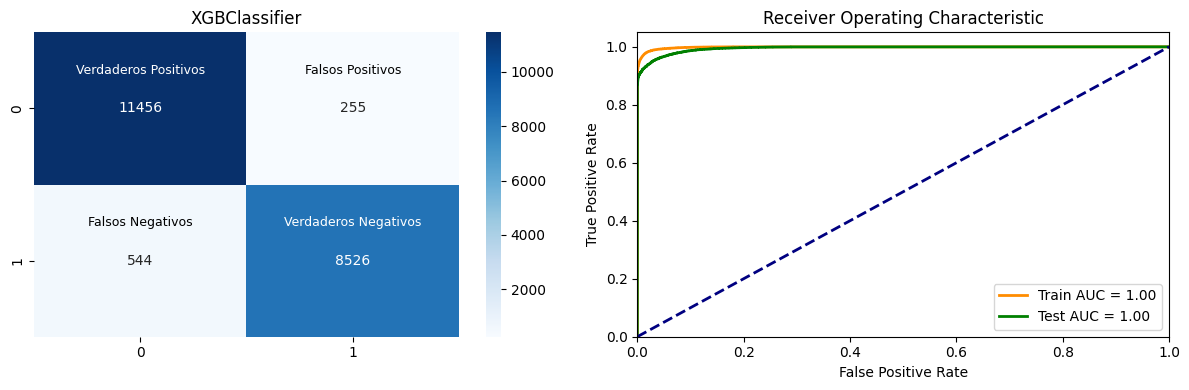

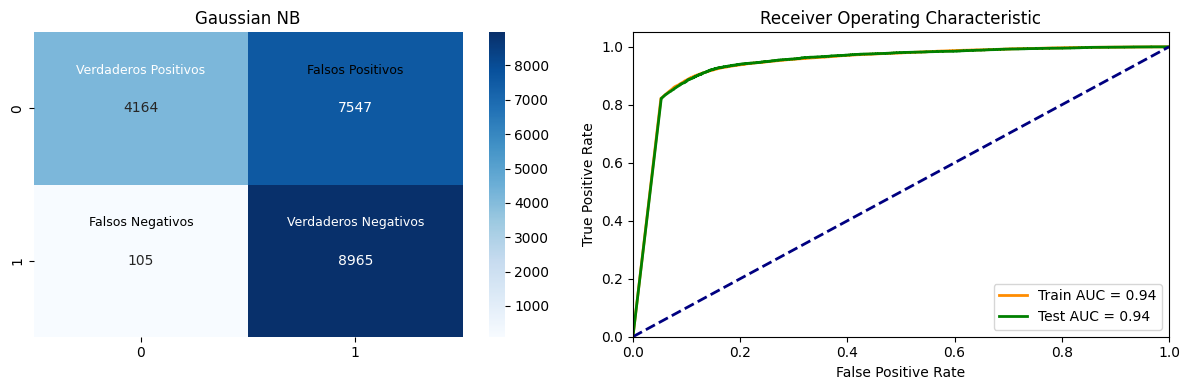

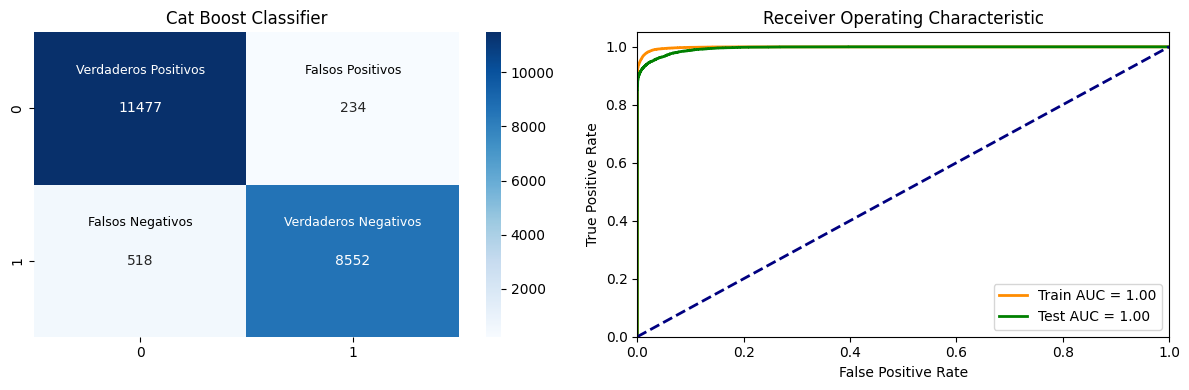

In [31]:
plot_metrics(df_metrics)

In [32]:
def print_cross_val_scores(df_metrics):
    data = []

    for i in range(len(df_metrics['Model Scores'])):
        model_name = df_metrics['Model'][i]
        model_scores = df_metrics['Model Scores'][i]
        fold_scores = {'Model': model_name}
        
        for j in range(len(model_scores)):
            fold_scores[f'Fold {j}'] = model_scores[j]
        fold_scores['Mean'] = np.mean(model_scores)
        
        data.append(fold_scores)

    return pd.DataFrame(data)

In [33]:
metrics_df = print_cross_val_scores(df_metrics)
metrics_df

,Model,Fold 0,Fold 1,Fold 2,Fold 3,Fold 4,Mean
0,Random Forest Classifier,0.859251,0.855321,0.865335,0.865656,0.856031,0.860319
1,Gradient Boosting Classifier,0.951961,0.955730,0.957892,0.957090,0.955406,0.955616
2,Logistic Regression,0.929104,0.934878,0.932226,0.935114,0.932948,0.932854
3,XGBClassifier,0.959339,0.962708,0.966394,0.963747,0.961100,0.962658
4,Gaussian NB,0.749138,0.625712,0.625120,0.625441,0.628569,0.650796
5,Cat Boost Classifier,0.959660,0.963670,0.965913,0.963667,0.962143,0.963011


In [34]:

def select_best_model(df_metrics):
    best_models = df_metrics.loc[(df_metrics['Overfitting %'] > 0) & (df_metrics['Overfitting %'] < 5)]
    
    # Calculate the mean of the validation metrics.
    best_models['Score'] = best_models[['Accuracy (validate)', 'Precision (validate)', 'Recall (validate)']].mean(axis=1)
    
    # Sort the models by the score.
    best_models = best_models.sort_values(by='Score', ascending=False)
    model = best_models.copy().iloc[0]    
    
    # Drop the columns that we don't need.
    model.drop(['Model Scores', 'Confusion Matrix', 'ROC Curve Train', 'ROC Curve Test', 'Score'], inplace=True)
    
    return pd.DataFrame(model)

In [35]:
# Print best model
result = tabulate(select_best_model(df_metrics), tablefmt='rounded_grid', showindex=True)
print(result)

╭──────────────────────┬──────────────────────────────╮
│ Model                │ Gradient Boosting Classifier │
├──────────────────────┼──────────────────────────────┤
│ Accuracy (test)      │ 0.9574611423896828           │
├──────────────────────┼──────────────────────────────┤
│ Accuracy (validate)  │ 0.9569799335931861           │
├──────────────────────┼──────────────────────────────┤
│ Precision (test)     │ 0.9642695099818511           │
├──────────────────────┼──────────────────────────────┤
│ Precision (validate) │ 0.9632261703327694           │
├──────────────────────┼──────────────────────────────┤
│ Recall (test)        │ 0.9372657111356119           │
├──────────────────────┼──────────────────────────────┤
│ Recall (validate)    │ 0.937630394202262            │
├──────────────────────┼──────────────────────────────┤
│ Train MAE            │ 0.04188187738603189          │
├──────────────────────┼──────────────────────────────┤
│ Test MAE             │ 0.042538857610317116   

/var/folders/d8/z387sy5n6jdg57dy2sd1lqbw0000gn/T/ipykernel_32150/4005017831.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create Pipeline and Pickle with best model

In [36]:
X_train_model, X_test_model, y_train_model, y_test_model, X_val_model, y_val_model = split_data(features_model, target_model)

In [37]:
# Select best model
model = GradientBoostingClassifier(
        learning_rate=0.3,
        loss="exponential",
        max_depth=4,
        min_samples_split=4,
        n_estimators=50,
    )

In [38]:
# Create pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [39]:
# Train model
model_trained = pipeline.fit(X_train_model, y_train_model)
model_trained

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod...
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.3,
                                            loss='exponential', max_depth=4,
                                            min_samples_split=4,
                                            n_estimators=50))])

In [40]:
# View the accuracy score
model_trained.score(X_test_model, y_test_model)

0.9574611423896828

In [41]:
# Predict target vector
predictions = model_trained.predict(X_test_model)

In [42]:
print(f"The model predicts {len(predictions)} values.")

The model predicts 20781 values.


In [43]:
# Save model
with open('../ML/model_gbc.pkl', 'wb') as file:
    pickle.dump(model_trained, file)

In [44]:
# Load model
with open('../ML/model_gbc.pkl', 'rb') as file:
    model = pickle.load(file)

### Generate a new test with external data and saved model

In [45]:
new_data = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'Loyal Customer', 'disloyal Customer', 'Loyal Customer', 'Loyal Customer', 'disloyal Customer'],
    'Age': [30, 40, 50, 30, 12, 10],
    'Type of Travel': ['Business travel', 'Business travel', 'Personal Travel', 'Business travel', 'Business travel', 'Personal Travel'],
    'Class': ['Business', 'Eco', 'Eco Plus', 'Business', 'Eco', 'Eco Plus'],
    'Flight Distance': [1000, 2000, 1500, 1000, 2000, 1000],
    'Inflight wifi service': [5, 1, 2, 4, 3, 0],
    'Departure/Arrival time convenient': [5, 1, 2, 4, 3, 0],
    'Ease of Online booking': [5, 1, 2, 4, 3, 0],
    'Gate location': [5, 1, 2, 4, 3, 0],
    'Food and drink': [5, 1, 2, 4, 3, 0],
    'Online boarding': [5, 1, 2, 4, 3, 0],
    'Seat comfort': [5, 1, 2, 4, 3, 0],
    'Inflight entertainment': [5, 1, 2, 4, 3, 0],
    'On-board service': [5, 1, 2, 4, 3, 0],
    'Leg room service': [5, 1, 2, 4, 3, 0],
    'Baggage handling': [5, 1, 2, 4, 3, 1],
    'Checkin service': [5, 1, 2, 4, 3, 0],
    'Inflight service': [5, 1, 2, 4, 3, 0],
    'Cleanliness': [5, 1, 2, 4, 3, 0],
    'Departure Delay in Minutes': [10, 4, 3, 20, 30, 10],
    'Arrival Delay in Minutes': [10, 20, 4, 3, 30, 10],
})

In [46]:
# Generate new predictions with the loaded model
new_prediction = model.predict(new_data)

In [47]:
new_prediction

array([1, 0, 0, 1, 0, 0])

In [48]:
# Add the predictions to the new data in the satisfaction column
new_data['satisfaction'] = new_prediction

In [49]:
new_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,30,Business travel,Business,1000,5,5,5,5,...,5,5,5,5,5,5,5,10,10,1
1,Male,Loyal Customer,40,Business travel,Eco,2000,1,1,1,1,...,1,1,1,1,1,1,1,4,20,0
2,Male,disloyal Customer,50,Personal Travel,Eco Plus,1500,2,2,2,2,...,2,2,2,2,2,2,2,3,4,0
3,Female,Loyal Customer,30,Business travel,Business,1000,4,4,4,4,...,4,4,4,4,4,4,4,20,3,1
4,Male,Loyal Customer,12,Business travel,Eco,2000,3,3,3,3,...,3,3,3,3,3,3,3,30,30,0
5,Female,disloyal Customer,10,Personal Travel,Eco Plus,1000,0,0,0,0,...,0,0,0,1,0,0,0,10,10,0


In [50]:
# Reverse mapping in satisfaction column
reverse_dict = {0: 'neutral or dissatisfied', 1: 'satisfied'}
def reverse_mapping(column, dic):
    return column.map(dic)

new_data['satisfaction'] = reverse_mapping(new_data['satisfaction'], reverse_dict)

In [51]:
new_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,30,Business travel,Business,1000,5,5,5,5,...,5,5,5,5,5,5,5,10,10,satisfied
1,Male,Loyal Customer,40,Business travel,Eco,2000,1,1,1,1,...,1,1,1,1,1,1,1,4,20,neutral or dissatisfied
2,Male,disloyal Customer,50,Personal Travel,Eco Plus,1500,2,2,2,2,...,2,2,2,2,2,2,2,3,4,neutral or dissatisfied
3,Female,Loyal Customer,30,Business travel,Business,1000,4,4,4,4,...,4,4,4,4,4,4,4,20,3,satisfied
4,Male,Loyal Customer,12,Business travel,Eco,2000,3,3,3,3,...,3,3,3,3,3,3,3,30,30,neutral or dissatisfied
5,Female,disloyal Customer,10,Personal Travel,Eco Plus,1000,0,0,0,0,...,0,0,0,1,0,0,0,10,10,neutral or dissatisfied


In [52]:
# Finally, add the new data to the original dataset
df_to_upload = pd.concat([df_to_upload, new_data], ignore_index=True)

In [53]:
print(f"El numero de filas actual es  {df_to_upload.shape}")

El numero de filas actual es: (103910, 23)


In [54]:
df_to_upload.tail(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied
103904,Female,Loyal Customer,30,Business travel,Business,1000,5,5,5,5,...,5,5,5,5,5,5,5,10,10.0,satisfied
103905,Male,Loyal Customer,40,Business travel,Eco,2000,1,1,1,1,...,1,1,1,1,1,1,1,4,20.0,neutral or dissatisfied
103906,Male,disloyal Customer,50,Personal Travel,Eco Plus,1500,2,2,2,2,...,2,2,2,2,2,2,2,3,4.0,neutral or dissatisfied
103907,Female,Loyal Customer,30,Business travel,Business,1000,4,4,4,4,...,4,4,4,4,4,4,4,20,3.0,satisfied
103908,Male,Loyal Customer,12,Business travel,Eco,2000,3,3,3,3,...,3,3,3,3,3,3,3,30,30.0,neutral or dissatisfied
103909,Female,disloyal Customer,10,Personal Travel,Eco Plus,1000,0,0,0,0,...,0,0,0,1,0,0,0,10,10.0,neutral or dissatisfied
